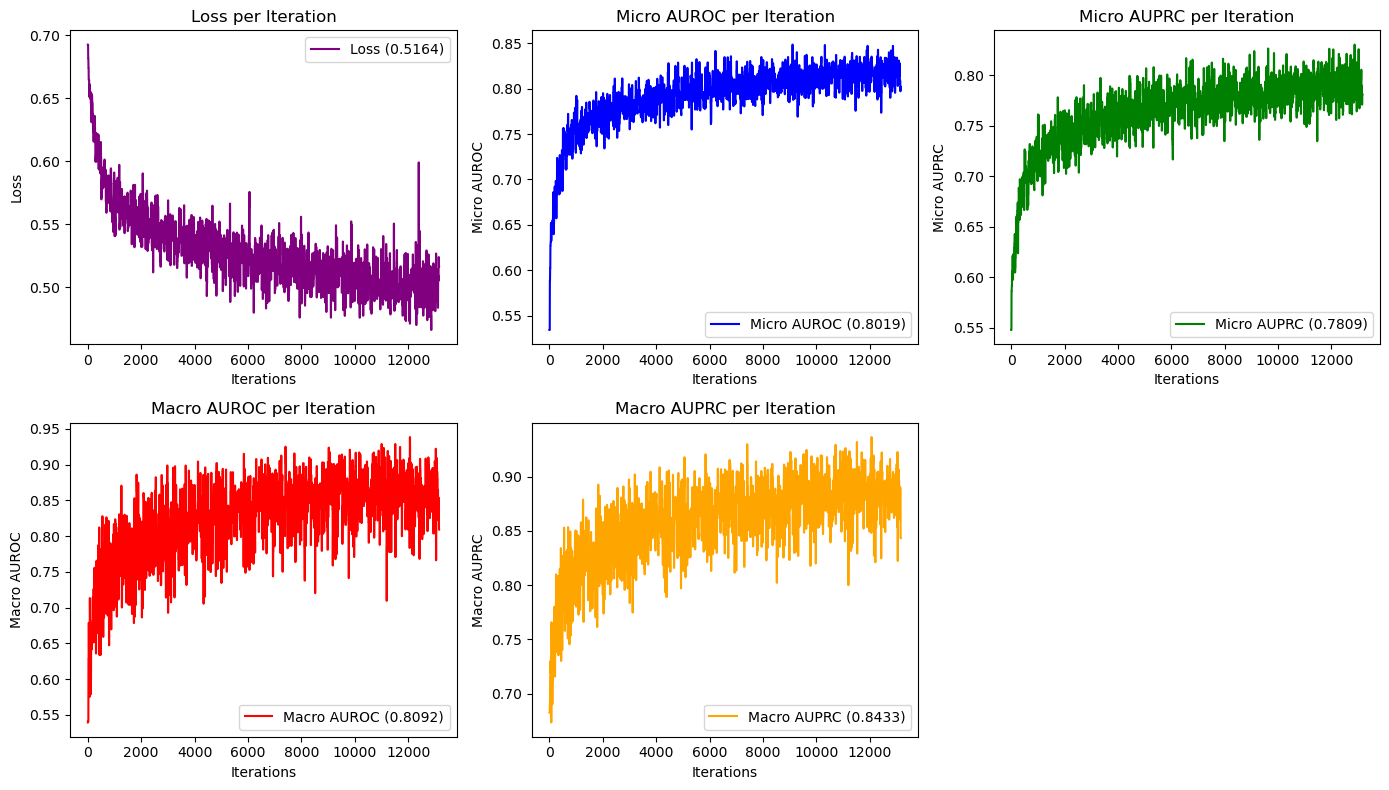

In [29]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Read the metrics from the file
file_path = 'metrics.txt'

with open(file_path, 'r') as file:
    logs = file.readlines()

# Lists to store metrics values for each iteration
loss_values = []
micro_auroc_values = []
micro_auprc_values = []
macro_auroc_values = []
macro_auprc_values = []

# Regex pattern to extract relevant metrics
pattern = r"Loss: ([0-9.]+), Pretrain Micro AUROC: ([0-9.]+) Pretrain Micro AUPRC: ([0-9.]+) Pretrain Macro AUROC: ([0-9.]+) Pretrain Macro AUPRC: ([0-9.]+)"

# Loop through each log line to find the metrics
for line in logs:
    match = re.search(pattern, line)
    if match:
        loss_values.append(float(match.group(1)))
        micro_auroc_values.append(float(match.group(2)))
        micro_auprc_values.append(float(match.group(3)))
        macro_auroc_values.append(float(match.group(4)))
        macro_auprc_values.append(float(match.group(5)))

# Adjust the x-axis to match 13,160 iterations (multiply by 10)
iterations = range(1, len(loss_values) * 10 + 1)  # Multiply by 10 to scale

# Expand the metrics to match the number of iterations (10 times each)
expanded_loss_values = np.repeat(loss_values, 10)
expanded_micro_auroc_values = np.repeat(micro_auroc_values, 10)
expanded_micro_auprc_values = np.repeat(micro_auprc_values, 10)
expanded_macro_auroc_values = np.repeat(macro_auroc_values, 10)
expanded_macro_auprc_values = np.repeat(macro_auprc_values, 10)

# Final metric values
final_loss = expanded_loss_values[-1]
final_micro_auroc = expanded_micro_auroc_values[-1]
final_micro_auprc = expanded_micro_auprc_values[-1]
final_macro_auroc = expanded_macro_auroc_values[-1]
final_macro_auprc = expanded_macro_auprc_values[-1]

# Create a figure with multiple subplots
plt.figure(figsize=(14, 8))

# Loss plot
plt.subplot(2, 3, 1)
plt.plot(iterations, expanded_loss_values, label=f'Loss ({final_loss:.4f})', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.legend()

# Micro AUROC plot
plt.subplot(2, 3, 2)
plt.plot(iterations, expanded_micro_auroc_values, label=f'Micro AUROC ({final_micro_auroc:.4f})', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Micro AUROC')
plt.title('Micro AUROC per Iteration')
plt.legend()

# Micro AUPRC plot
plt.subplot(2, 3, 3)
plt.plot(iterations, expanded_micro_auprc_values, label=f'Micro AUPRC ({final_micro_auprc:.4f})', color='green')
plt.xlabel('Iterations')
plt.ylabel('Micro AUPRC')
plt.title('Micro AUPRC per Iteration')
plt.legend()

# Macro AUROC plot
plt.subplot(2, 3, 4)
plt.plot(iterations, expanded_macro_auroc_values, label=f'Macro AUROC ({final_macro_auroc:.4f})', color='red')
plt.xlabel('Iterations')
plt.ylabel('Macro AUROC')
plt.title('Macro AUROC per Iteration')
plt.legend()

# Macro AUPRC plot
plt.subplot(2, 3, 5)
plt.plot(iterations, expanded_macro_auprc_values, label=f'Macro AUPRC ({final_macro_auprc:.4f})', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Macro AUPRC')
plt.title('Macro AUPRC per Iteration')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
